In [1]:
import sys
sys.path.insert(0, '../..')
from g4l.estimators import BIC
from g4l.estimators import BIC2
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

In [14]:
dt = '00010101010100100010101000100100101010101001001010100101010010101010010010010101010010010010101010010100100010101010101010100100100101000101010101010100010010000100101000100100101001001010100010100101010100101010101010010100101010010101010100100101001010101010001010001001010101010101010100101010101001010010100100101010101001010101001001010101001010101001010010010100100101010100100101010010100010010010101010100101010101010101010100100101000101010101010001010001001010010010101010010010101001010100010100100001001010100101010101010010100010101001010010001010100100010010101010010101010101010010100101010010101010101010101010010010101010101010101010010101010101010101001010101001010010101000100100000101010100100101001001001010100010000101010101010100101010101010100101010101010101010101000101000101010101010101000100101010100101001010100101010101010101001001010100101010100100101010100101001010101010101010101010001010010100001001001010101010101010001010101010010010101010100010100001001010101010101000101010100001000000101001010101001010101010101010001001010100010010101001010101010101010101010010100101010010101001010100010100101010101001010010000101010010010100101010101010101010100101010010101010101010010100101001010100010101010101010101010101001001010010101001010101001010010101010101010010010101010101010010100101010101010100101001010100100010100101010101001010000101010001001010101001000101000100001010101010100101001010101010101010101001001001010101001000101010101001001010101010101010100101010100101010101001001010001010100101010100101010100101001010101010100101010101010101010101010100101010010100101010010101001010101010101010001010101000101000100010101010101010101001010101000101010101001001010010101010100101010101010101010100100101000001010101010101010101010000100101010010101001010101001010010010010100101000100010100101010101010101010101010101010010100101010101001000010100101010010100100101010010010101001010100100100100101000101010100010101010101010101010100010010101000010000101010101010101001001010100101010101001001001010101010101001001010101010101010100101010101001001010101010101010000100101010101010100101010101010010101010101010101010100010101010100101001010101001001010101010101010101010101001010100100010100100010010101010100101010101001010010010010100101010010010101010010100101001001010100101001010100101010100101010100010100101010101010010101010101001010101010010101010100100100100010100101000100101010101010010101001010101010101010100101000101001001010101001001010101010101010101010010100101001000101010101010101010100010101001001010101001010101010010100101010101010100101010100101001010001000100010101010010010101010100100100010010101010101001000101010100101010010010100100001010101000010010010100010100101010101001001010101010010010101001010010010101010010100010101010010010010010101010100100101010001010101010100100100010010100100101010101010101001001001010100101010010100100101010101010010101010101010101010010101010100100010100100101010101010101001010100100101010101001000010010010100000100101001001010010101010010101010101010010100100101010101010010010100101010101010101010101001001010100101010010101001010100101010101000101010100101010000001010100101001010101010010101010010010101010101010101010101010101010100101000101010101010010010100101001001010101010101001001000100100101010001010101000101010001010101010101010101010010101010010101001001010010101010101000010101010100101010010101010010001001010001010010101010101010010101010101010100100101010100101010101010100100101010100101010101000100101001001010100101010010101001010010010101010101001010101010100101010001010101010101010101001001010010100100101010010001010101010010010010010100101010101010100101010101010101001010101001001001010100101010100101010101010010101001010101010101010100101010101001010101001001010101010100101001010010010101001000101010010000010010100101010101010001010100100101010010101010100101001010010101010101001001010010101010101010101010101010100101001010101001010101010101000100101001001001010010010100101010101000100001001010101010010101010101001010101001010101000101010010101010101010010100100101010101010101010101010010101010101001010101001010101001010101010010100101001010010101010100101001010101001010100101010101001010101000010101010010101001010101010100101010001000101010101010100100101000101001010101010100001010101010001010101010010000101010101010000010010100101010010101010101010010101001010101010100101001010010101010101010010001010101010101001000101010010101010100101000101010101010100100010010101010010100101010101000100101010001010101010010101010010010000101010101010101010101010001010010001010101001010100010010101010010100101010101010101010101001001010010101010100001001010101010100010010010101001001010101010010101010010101010100010001010010101010010100101010101010101000100100101010010101001010101010101010010101001010101010101010101001000010101010101001010010100101001010101010100101010101010010100101010101001010101010010101001010010100101001010101010101001010101010101010010101010100101001001010101010100101010101001010010100010100101001010100101010101001010001001010100100101010101001010100101001010101010010101010101010010101001010101010101010100010010101010101010000100010101010101010100101010101010101010101010101000101010101010101010101010101001001010101010100101010101010101010010001010101010101010010010010001010010101010010101010101010100101010010010010101010100010010010101010101000101001000101001010101010100101010101000101010010101000101001010010101010101010101010101010100101010100010101010101001010100001010101010010001010100101010010001010101010101001010010100101010001010101010010010001010101010100101001010010100100100101010100010000001010100101010100100100010101001010101010100101010010100101010010101010101001010101001010100100010010100010100100101010101010010101001010101001010001010100010101010010100101010101010101001010101001010010100101001001001010101010100100010101010000101010010101010101010101001010010101010010100101010101010101010101010100100100101000101001001010010100001010101001010101001010100100100101010001010010010101010100010101010100010100101010101000100101010100101001010010101000100010101010010010100101001010101001010101010101010010101010101001010100010101010101010010101010101010101010100101010100101010101010010010010010010101001010101001010100100101010100010100100101010101010101010010101010100100100010101010010010100100100001000001001010101001010100101010101010010010010101010100100101010101010101010010100100010101001010101010101010101010101010010101001010101010101010101000001001010101010101010010101010101010010101000101010001010010001010101010001001010100101010001010001010010101010101010101001010100001010010101010101010010101010100101010101001001010010001010100100101010101010100100101010010101010010010001001010101010010101010101010100101001010010010101010100100010101001010010101000100010101010000101010010101001010010101010101010101001010101010010010101010101010101001010101001001010101010101001001010101001001001010101010100100101010101010101001010101010101010010101010101001001010101010101010010010100100000101010101010101001010101010101010101001010101001001001010101010010101000101010001010100100101001010010101010101010010100100010101010010101001010010101010101010010010010101010010101001010101001001001010101000010100101001010101010101000101010010101010101010100010101001001010010100100101010100100100100101010101010101010101010010101010100101010100100100101010101010010100101010100101010101010100101010101010100101000101001010101010010000101010101010101010101010010100100101010100100101000010010101010101000100100010100101010101001010101010101000101010101010101010101010101010100010101010101001010101010100101010101001001010101010101010000010100101010010010101001010100100101010100100001001001000101001000101010010101010101010101001010101010010101001001000101010010010010101001010101010100010001001010101001010101001001010101001000100010010101010100101010101001010100000100101010100100100101010100101010010101010101010000100101010010101010100001010010101001010000100101010101010010101010010101010101000100101010100100100100101010101010010101010101010101010100101010101001010101010010101001001010101001001001010101010010100100101010101001010101010101001010101010010010101010010101010101010010100101010010101010101001001010101010101010101010100101001001010101010101010100101010010101001010010101010010010101010101010010101010101010101001001001010101001010010100101010010100101010010101001010001010010101001001001010100101010100100100101010101001010100001010100000101001010100101001010101010101010010100101010101010101010010101010101001010101001001010100101010101010010101010101010101001000010100010100101010101010101010100101001001010010010010010101010100100101010010101010101010101010100101001010010101010100101001010010101010000100010001010100101001001001000101010101001010100101001010100100100100100101010101001001000101010010101010100010101010101010101001010010010101010101010010010101010100101010101010101001010010100100010100101000100101001010101010010101010101010010101010010101010101010101001001000101010010101010101010100100100101001001010100100100101010101010010101001001001010010101010100100100101010100101010100100010010101010101010101001010100101001010101010101001001010100010101010010010100010101010100101000101010001010010010100101010001010100101010100101001010010100100101010101010010100010100101001010101010101001010101010010101010101001010101010101001001010100100101010101010010100100101001010010101010101010100010101010100010010101010101010101010101010010101001010100101001010100010010100101010010010101000101010010101010010101010101010100100101010101000101010010101010010101010100101010010100101000100100100101010101010101010001010101010010101001010101010010101010101010101010101010010000100101001010101010100101010010101010101010010100010100100101010010101010101001001010101001001010101010100101010101010100101001010101010101010101010010010101010101010010101010101010010010101010101010010100100101010001010010000101010010100101010010101010101010101010010101001001010101001010101001010101010101010100101000010010101001010101010101010101010101001010001001010100010101001010101010000101010001000100101001001010101010101010100000010101010101010010100101000101010101010101010101001010101001010100101010101010100010010010001010100100101010101001010010010100101010101010010001001010100101001010101010100101010100100100101001001001010101010100100101010101001001010100100010101010101001010101010101010101010010101010101010101010101001000100101010100101001000100101000100101001010100100101010101001010101010101001001001010101010101010101010000101010100100101001010101010010010101010101001010010101010101010101000100101010010101010101010101010010010101010100101000100101010100101001010101010100101010010101001010101010010101001010100100001010100001010010101001010010100100100100101010101010101010101010010101010101010100101000101010101001010010101010101001001010100101001000101010010010101001001010101010100101010101010101010101010101010101010010010001010101000001010101010010101010101010101001010100101010101010100100101010101010101010100101010101001001001010100101010001010100010101010101010101010010010101010101000101010010100101000100101010001010101010010100101010010101010100010100001001000010101010100101010010000101001010100100101010100101001010100101001010101010101000100101001010101010100100010010100101010101010101001001001001010010010101010101010101001001010010100101001010101001010101001010101010101010101010100100100101010101001010101010000101010101001001001010001001001010101010101010001001010101000001001010101010101010101001001010101001010101010101010101010001001010100100100101010010100101010010100010101010101001001010101001010101001010010100101010101010010101010001010100100100101001010100100101010100010101001001010101010101010100010101010010010010101001001010101001010101000100101001001001000101010100101001010101010010010100101010100000101010101010100010101001010101010010100101001000100101010101010010010101000010101010010010000101010101001001010101010101010010101001001010101001010101001010100101010101001001010100100101010100010101001010000100101010010101000000001010101010001010101000001010101010101010001010101001010100101010101010100101010010100101010010001001010010101010010101010101010101010101010001010101010010010101010010101010101010101010001010010101010010101001010101010010101000100101001001010100101001010101010101000101010100100101010101010100101010010101010101001010101001001001000101010101010100010010101000101010001001010101001010101010010100101000101010010101010100001010100010101010010101010010100100010101001010010100101010010101010000101001010101010101010100100010010100100100101010010010100101010000100100100101001010100001001010010101010100101010100100101010101000100100101010010101010101001010010100101010010001010100101010010101010101010010101010010100101010101000101010100101010101010010000100101010101010101001001001010100001010101010101010101010101010010101001010101001010100101000010101010010100101010100100100010101010100100101001010101000101010101010010001010100101010101010101010101010001010101001001010101010101010100010010100010101001010101010010101010101010010101010101010100100101010010101010101001001001001001001010101010100101010100101001010101001001001010010101010010010101001010010010001010100100101010101010100101001010101001010101010101010010101010101001010001010010100100010101010010101010001010101001010101001001010101010101001010010010101010100101001010101000101010101010000101010101001010010101001010010001010100100001010010101001010101010100101010100101010101001010101010010100101010010010100010001010101010010010010101010101010010101010101001010100101001010100010101001010010010101010101010101001010010101010101010101010101010100000010101010101010010101010010010101010100010100100010101010101001010100101010000101001010000001010010101010100010010101010010101000101010000100001001010101010101010001010101010100101001010101010010101010010100100101001010101010101010100101010101001010101010101010101001010101001010101010101010100010010010101010101010101010010001001010101010010101010000100101010101001010100101010101010100001010101010100001001010010100101010101001010101001010101001010100101001010101001010010101010101010010101010101010010101010100101010101010101010101010101000101001001010100101010101010101010101010101010100101001001001001001010101010101001001001001010101010101010101010101010101010101001010101010101010101001010100101001010101010101010101010101001010101010101010101001001001010101010101010101010101000101010101010101010101001010101010101010010100010101010010010101010101010101000010101010100101000101010010101010101010010101001001010100101000101010101001010101001010001010100101010100100010010010101001010100101010101010100101010010001010101010100101010101010101010101001010101010101000000001010100010010101010101010101010100100101000101000010101010101010101010010000100010101010100101010101010010100101010101010100101001010100101010100101000101010001010010101001001010100010101010010010010101010101001010101001010101010100101010100101010101010000010100010101010101010101010101010101001010101001010100010010101010100101001001000101010100010010010101010101010101001010000001001010101010100101010010100101010101010101001010101010101001010101010101000010010101010101010100101010010010010101001010101001001010010000101010010101010010100101001001010100001000101000101001010100100100101001001010100101010101010101010100010010101001010101010010010001010010010101010101010101010010101001010101010101010100100101010100100100100101001010101010101010101010100101010010100100101010010100010100101001010101001001010100101001001010100010101001010100000000101001010101001000100101010101010100100010010101001010100101001000101010001010101001010101000010001010100100101010100010101010101010100101001010101010101010010100101010101010010100010101010101010001010101010010010100101000101001010100101001001010101000101010010101010100101010010100101010101010101010101010010101001010010101010101001001010100100100101010010100101000101001010100100101000100100101010101010100101001010101010000100101010010001001010101010100101001010101010100000101010000010101010010100010101010101010101000101010101010101010010101010001010100101001010010001010100101010100100100010101001001010001010101001001010000100010010101001000010101001001001010010101010101010100100010101000010100001010101010101010101010101010100100101010101010101010001010010101001010100101010100101001010101010100100101000000101010010101010100010101010100100101010100001010101000101010100101010101001010100101010010101010010101001010101010101010101001010010010101010010100100100100101010101010010100100010010100010101001010010010100101000100101010101010101010010010010101010101010101001010100101010101001010101010100101010100101010101010101010010101010010101001010100101000101010101010100010010010101001010010010101010101010010101010010101010100010101001010000101010101000101010100100010000101010101010010101001001010101010100101010100000100100010100101001010101010010100010101010101010101010100100100001010101010100100001010101001001001010101010101010100010101010101010101010010101010010100101010001010100101001010010010010100100100010101001001010101010100101010100010100101010010100101010101010010010101010101010101001001010101010101010101010100101001010100101001010101010101001010010010101001010101001010101010101010010101010101010101010101010101010101010010101010101010010101010100100101010101010101001010100101000000101001000101010100010100101001001010101010010101010101010101010101010010010010010000101010101010101010101001010100101010010101001001010001010101010010010101010100101010101010010101001010100101010010101010010100101010101010101010100101010101001010100100100101001001001010101010100100010101010010010101010100010100101010101010101001000101001010101010101001010100101000100100010100100100100010101010101010010101010100101010100101010010001001010101001010001001001010010100101010010101010101000101010100010010001010101001010010100001010010010100101010101010010100101001010101010101001010101010010101001010101010101010010101010101010101010100101001010010001010101001010101010101010001010101001010100101010101001010010101010100101010100101001010100101010101010101010010010100101010010101010101001010101010100100010010101010101010010100010010010100101010101010101010010101010010101001001010100100101010100101010100101010010101001001010100101010101001010101010001010100100101010101001001010101010101010101010100010101001010010101010100101001001010100101010100001001010101010001010101010101010100101001010100100101010101001010010100101010101010100001001010101010010101001010101010101001010101010101010101010101010100101010101010010101010101010010101010010100101001010001010001010100101010101010101000101010001000101010010101001010010101001010101001010101010101010101000101010101010101001010010101010101010010101010101000100100101010101010010010101010100100101001010101010101001001010100010100100100101010101010101001010100101010101010010100100101010101010010100010100101010101010010101010010100101010010100101010101010100010001010101010010100101010101001000100101010100100010010100101010010101010010101010010101001001010101001010101010101010101001010101010100101010100010101001010100010101001010100101010101010010101001010101001010010101001010100101001010100010101001010100100101010101001010001010010100101010010100101001001001001010010101010010101010010101000101001010101010101010101010100101001010101001010010101001010010101010101010101001001010010101010010100001010101010100101010101010101010001010010100010101010101010101001010101010101010001010101010100101010101010101010001000101010101010101010101010100010010010101001001010101010101001010010010101010010100100101001010101010100010101010000101010101010100101001010101010010101001010101010101001000101010101010001010101000101010100101010101010101010010101010010001010010010100010010100101000101010101010101000'
#dt = '000101010101001000101010001001001010101010010010101001010100101010'
X = Sample(None, [0, 1], data=dt)
max_depth = 6

In [19]:
t = ContextTree.init_from_sample(X, max_depth, force_admissible=True)
t2 = ContextTree.init_from_sample(X, max_depth, force_admissible=False)

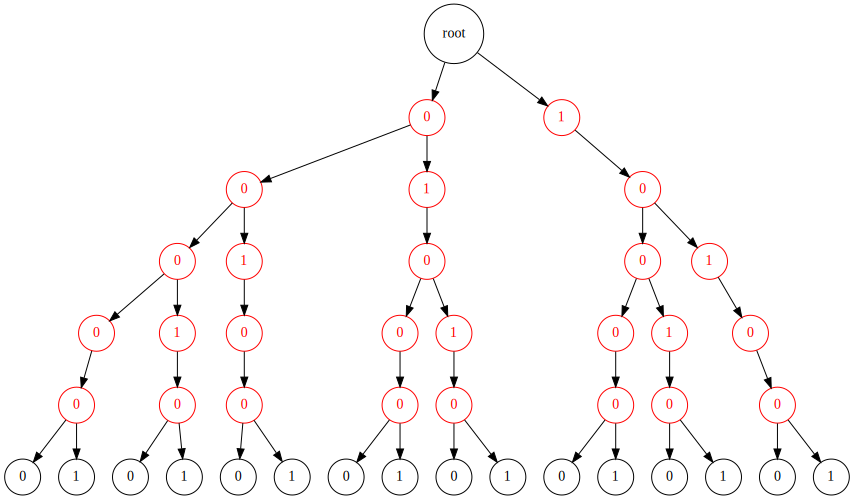

In [20]:
g4l.display.draw_tree(t, size='200,400')

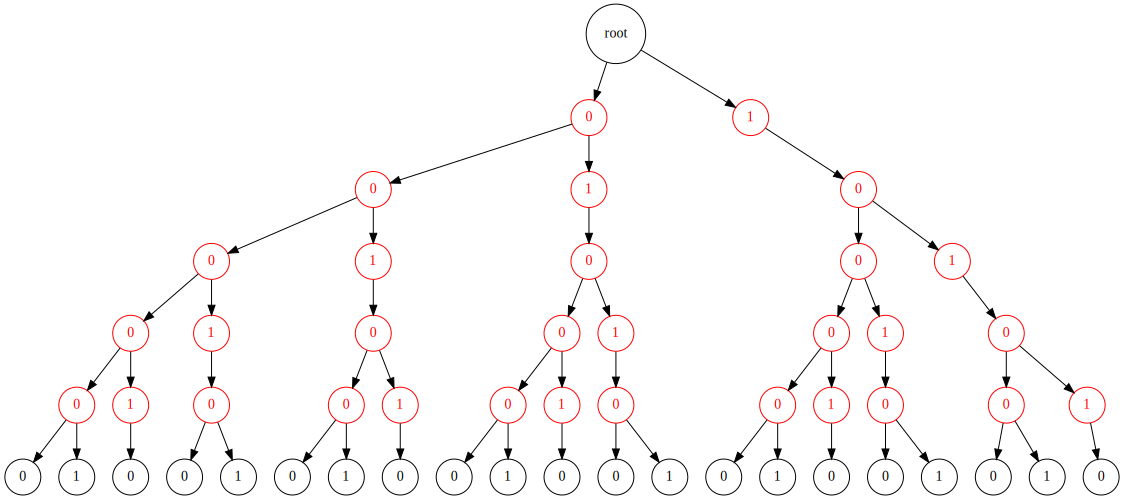

In [21]:
g4l.display.draw_tree(t2, size='200,400')

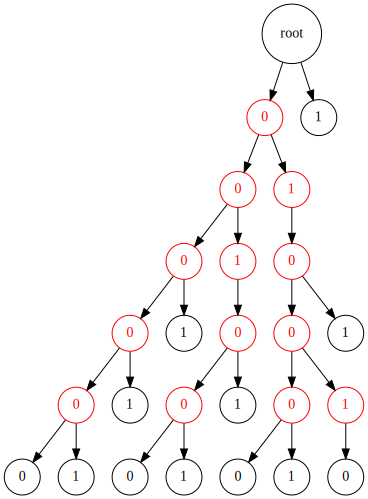

In [37]:
r = '000000 000010 000100 010010 1 1000 10000 100000 100010 100100 1010 10100'
g4l.display.draw_tree(r, size='400,400')
#g4l.display.draw_tree('000000 000001 000010 000100 000101 001000 001001 001010 10000 100000 100001 10001 100010 10010 100100 100101 10100 101000 101001 10101 101010', size='400,400')